# STAT 201 - Proposal
### Group 16 - Karina Grewal, Michelle Kim, Alex Lee, Janine Xu

## Introduction

Inequality of quality of education and achievement imbalance in public and private/independent schools students was seen in many different countries including the USA<sup>2</sup>, Mexico<sup>3</sup>, and China<sup>4</sup>. Canada spends more than 5% of the federal budget on public education, recording one of the highest in the world<sup>5</sup>. So, we became curious if we can observe a similar phenomenon in Canada, particularly BC, where the students from independent schools showcase higher academic achievement than in public schools. 

**Question**: Are English 12 marks higher in independent schools in BC compared to public schools?

**Random variable**: average mark per school (%)

**Categorical variables**: BC public school vs independent school

**Location parameter**: difference in mean (if average marks are higher in private vs public schools)

**Scale parameter**: standard deviation (can be used to find confidence interval and shows the spread of the data)

Our dataset is from the BC Ministry of Education<sup>1</sup>, and shows examination results from 2016-2020. The dataset contains several important columns for our analysis:
- PUBLIC_OR_INDEPENDENT (type of school, independent/public)
- EXAM_SUBJECT (includes 4 language course types, such as English 12)
- MARK_TYPE (type of mark given, e.g. final marks or exam marks)
- AVERAGE_PERCENT (the average percentage in a school)

We decided to look at final marks, which are the final marks for each course blending exam results and course results, to get the full picture of student scores. The only course types available were language courses, so we also focused on English 12 because it was the most commonly taken compulsory grade 12 course in BC, compared with other courses, such as Français 12, which is not offered in all schools.


## Preliminary exploratory data analysis

**Null Hypothesis**- There is no difference in the provicial examination grades in Public or independent highschools in BC 
**Alternate Hypthesis**- In BC, Independent highschools has higher provicial examination grades than Public highschools.

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

In [2]:
# reading data from the web
exam_data <- read_delim("https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv", delim = ",")

# check if data size is sufficient
exam_test<-exam_data %>% 
    select(PUBLIC_OR_INDEPENDENT) %>% 
    group_by(PUBLIC_OR_INDEPENDENT) %>% 
    summarize(n=n())

exam_test

# clean and wrangle data into tidy format
exam_school_type <- exam_data  %>% 
                    select(PUBLIC_OR_INDEPENDENT, AVERAGE_PERCENT, MARK_TYPE, EXAM_SUBJECT) %>% 
                    filter(AVERAGE_PERCENT != "Msk") %>% 
                    filter(PUBLIC_OR_INDEPENDENT == "BC Public School" |PUBLIC_OR_INDEPENDENT == "BC Independent School") %>%
                    filter(EXAM_SUBJECT == "ENGLISH 12" & MARK_TYPE == "Final Marks" ) %>% 
                    mutate(AVERAGE_PERCENT = as.numeric(AVERAGE_PERCENT))
head(exam_school_type)

Parsed with column specification:
cols(
  .default = col_character(),
  SCHOOL_NUMBER = col_logical(),
  SCHOOL_NAME = col_logical(),
  GRADE = col_double()
)

See spec(...) for full column specifications.

Warning message:
“81714 parsing failures.
 row           col           expected                actual                                                                                                                                     file
2314 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2314 SCHOOL_NAME   1/0/T/F/TRUE/FALSE Mount Baker Secondary 'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2315 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-exam

PUBLIC_OR_INDEPENDENT,n
<chr>,<int>
BC Independent School,7377
BC Public School,41316
Province-Total,225


PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,MARK_TYPE,EXAM_SUBJECT
<chr>,<dbl>,<chr>,<chr>
BC Public School,73.2,Final Marks,ENGLISH 12
BC Public School,68.2,Final Marks,ENGLISH 12
BC Public School,73.6,Final Marks,ENGLISH 12
BC Public School,70.6,Final Marks,ENGLISH 12
BC Public School,73.4,Final Marks,ENGLISH 12
BC Independent School,78.2,Final Marks,ENGLISH 12


In [3]:
#get sample
set.seed(122)
exam_school_type_sample_public <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample_Independent <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample <- rbind(exam_school_type_sample_public, 
                                 exam_school_type_sample_Independent) %>% 
                        ungroup() %>% 
                        select(-replicate, -MARK_TYPE)
head(exam_school_type_sample)

PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,EXAM_SUBJECT
<chr>,<dbl>,<chr>
BC Public School,69.6,ENGLISH 12
BC Public School,68.4,ENGLISH 12
BC Public School,69.1,ENGLISH 12
BC Public School,77.7,ENGLISH 12
BC Public School,72.5,ENGLISH 12
BC Public School,72.3,ENGLISH 12


In [4]:
# getting the mean and standard deviation of average percent for each school type 
#   and the diff of their mean (BC Independent School - BC Public School)
data_for_each_catetegory<- exam_school_type_sample %>% 
                group_by(PUBLIC_OR_INDEPENDENT, EXAM_SUBJECT) %>% 
                summarize(mean = mean(AVERAGE_PERCENT),
                          sd = sd(AVERAGE_PERCENT))
obs_diff_in_mean <-   exam_school_type_sample  %>% 
    specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>%
    calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School")) %>% 
    mutate(diff_in_mean = stat) %>% 
    select(-stat)

data_for_each_catetegory
obs_diff_in_mean

`summarise()` regrouping output by 'PUBLIC_OR_INDEPENDENT' (override with `.groups` argument)



PUBLIC_OR_INDEPENDENT,EXAM_SUBJECT,mean,sd
<chr>,<chr>,<dbl>,<dbl>
BC Independent School,ENGLISH 12,79.2775,6.059851
BC Public School,ENGLISH 12,71.9425,4.295787


diff_in_mean
<dbl>
7.335


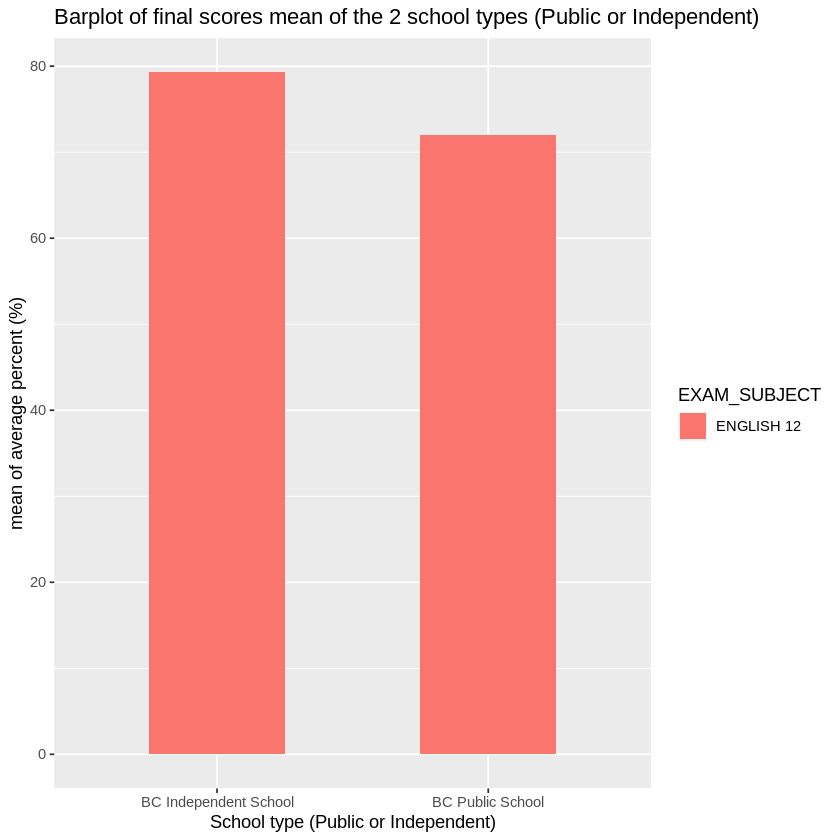

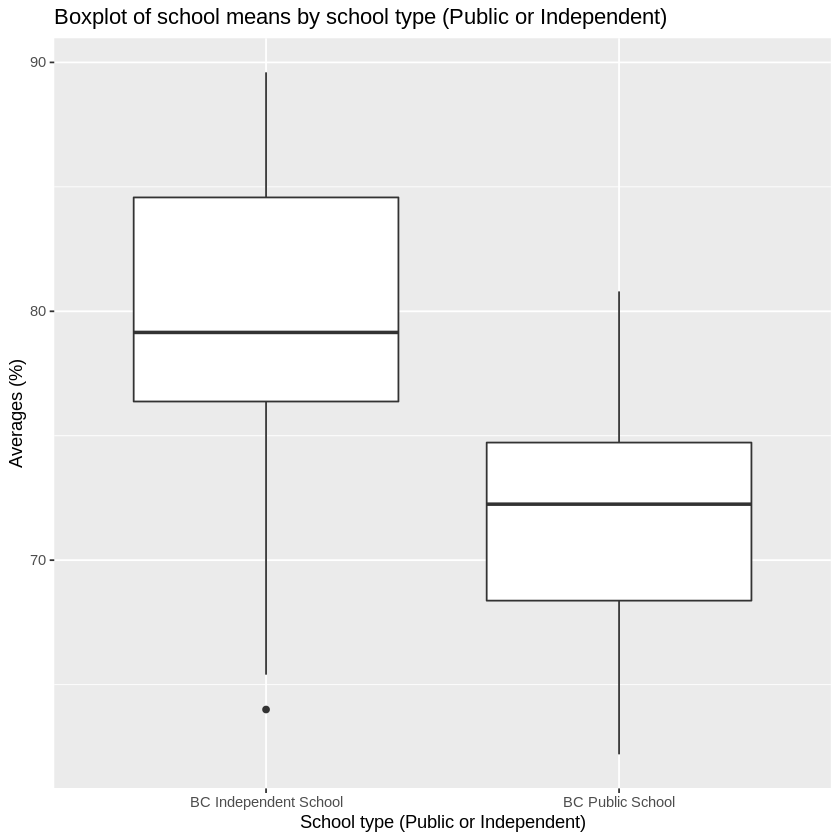

In [5]:
# generate bar graph
exam_barplot <- data_for_each_catetegory %>%
    ggplot(aes(x = PUBLIC_OR_INDEPENDENT, y = mean, , fill = EXAM_SUBJECT )) +
    geom_bar(stat="identity", position = "dodge", width = 0.5) +
    xlab("School type (Public or Independent)") +
    ylab("mean of average percent (%)") +
    ggtitle("Barplot of final scores mean of the 2 school types (Public or Independent)") 
exam_barplot

# generate boxplot 
exam_boxplot <- exam_school_type_sample %>%
    ggplot() +
    geom_boxplot(aes(x = PUBLIC_OR_INDEPENDENT, y = AVERAGE_PERCENT)) +
    ggtitle("Boxplot of school means by school type (Public or Independent)") + 
    xlab("School type (Public or Independent)") + 
    ylab("Averages (%)")

exam_boxplot

## Methods

Our report is trustworthy as our data came from an official government source for grades of all grade 12 students studying in BC. Therefore, it will be appropriate to generalize our findings to all grade 12 students in BC highschools. Our sampling methods were random to ensure the most accurate results. 

The boxplot appears to show that independent schools have a higher average, but we cannot reach a conclusion without conducting a hypothesis test. With that test we will be able to tell whether our findings are statistically significant.

We will conduct a one sided hypothesis test;
- H<sub>0</sub>: There is no difference in the final English 12 grades in public or independent high schools in BC
- H<sub>A</sub>: In BC, independent high schools have higher English 12 final grades than public high schools

Our confidence intervals will cover the mean grades of each type of school as well as the difference in mean grades.

Since our data doesn’t break any of the 3 rules needed to perform CLT, we plan to use the t-test to perform our hypothesis testing  

We expect to find that the mean final grade for English 12 students at BC independent schools will have higher scores than students at BC public schools. The findings could potentially influence current and future parents' decisions on where to send their children to receive an education. Future questions can ask if a family's socio-economic status affects their children’s grades.

## Reference

1. Analysis and Reporting Unit, Ministry of Education. (2020). BC schools grade 10, 11, 12 examinations results 2016/2017 to 2019/2020. British Columbia. 
2.  Chen, G. (2019, April 5). Public School vs. Private School. Public School Review. https://www.publicschoolreview.com/blog/public-school-vs-private-school#:%7E:text=Private%20school%20students%20generally%20perform,counterparts%20on%20standardized%20achievement%20tests.&text=Their%20average%20scores%20were%20above,science%20and%20mathematics%20proficiency%20tests.
3. Hernández-Gálvez, D. C., & Roldán-Valadez, E. (2019). Mexican ENARM: performance comparison of public vs. private medical schools, geographic and socioeconomic regions. Salud Pública de México, 61(5, sep-oct), 637. https://doi.org/10.21149/10078
4. Ma, Y., Hou, X., Huang, J., Wang, W., Li, Y., Zhou, X., & Du, X. (2018). Educational inequality and achievement disparity: An empirical study of migrant children in China. Children and Youth Services Review, 87, 145–153. https://doi.org/10.1016/j.childyouth.2018.02.026
5. UNESCO Institute for Statistics. (2020, September). Government expenditure on education, total (% of government expenditure) [Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government.]. The World Bank. https://data.worldbank.org/indicator/SE.XPD.TOTL.GB.ZS
